In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
from sklearn.decomposition import PCA

%matplotlib inline

In [10]:
### Read in inputs dataframe as well as weights and target series from job 03_var_reduction.ipynb
new_X_train = pickle.load(open("new_train_inputs.p",'rb'))
new_X_test = pickle.load(open("new_test_inputs.p",'rb'))
y_train = pickle.load(open("y_train.p",'rb'))
y_test = pickle.load(open("y_test.p",'rb'))
wt_train_ = pickle.load(open("wt_train_.p",'rb'))
wt_test_ = pickle.load(open("wt_test_.p",'rb'))

In [11]:
def report2(results, n_top=1):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
### Select estimator
svm = SVC(kernel='rbf', cache_size=7000)
### Set up grid search
param_grid = {
              'C': [1, 10, 100], 
              'gamma': [0.1, 0.01, 0.001]
             }
             
grid_search = GridSearchCV(svm, param_grid=param_grid, fit_params={'sample_weight': wt_train_})

grid_search.fit(new_X_train, y_train)
report2(grid_search.cv_results_) 

Model with rank: 1
Mean validation score: 0.192 (std: 0.007)
Parameters: {'C': 1, 'gamma': 0.001}



In [22]:

### Select estimator
svm = SVC(kernel='rbf', cache_size=7000)
### Set up grid search
param_grid = {
              'C': [1], 
              'gamma': [0.001]
             }
             
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=10, fit_params={'sample_weight': wt_train_})


n_components = [2, 5, 8, 10, 15, 25, 50]
for n in n_components:
    pca = PCA(n_components=n)
    pcafeatures_train = pca.fit_transform(new_X_train)
    grid_search.fit(pcafeatures_train,y_train)
    report2(grid_search.cv_results_) 
    print(pca.n_components, pca.explained_variance_ratio_)

Model with rank: 1
Mean validation score: 0.166 (std: 0.014)
Parameters: {'C': 1, 'gamma': 0.001}

2 [ 0.12298248  0.04204066]
Model with rank: 1
Mean validation score: 0.185 (std: 0.015)
Parameters: {'C': 1, 'gamma': 0.001}

5 [ 0.12298248  0.04204066  0.03322995  0.0253291   0.0228212 ]
Model with rank: 1
Mean validation score: 0.179 (std: 0.015)
Parameters: {'C': 1, 'gamma': 0.001}

8 [ 0.12298248  0.04204066  0.03322995  0.02532915  0.0228214   0.01998307
  0.01743532  0.01538404]
Model with rank: 1
Mean validation score: 0.193 (std: 0.009)
Parameters: {'C': 1, 'gamma': 0.001}

10 [ 0.12298248  0.04204066  0.03322995  0.02532911  0.02282135  0.01998348
  0.01743545  0.01537758  0.01476704  0.01423835]
Model with rank: 1
Mean validation score: 0.192 (std: 0.019)
Parameters: {'C': 1, 'gamma': 0.001}

15 [ 0.12298248  0.04204066  0.03322995  0.02532915  0.02282143  0.01998364
  0.01743627  0.01538893  0.01477519  0.01425204  0.01384561  0.01321387
  0.01261581  0.01234929  0.0113403 ]

In [23]:
svc = SVC(C=1,gamma=0.001)
pca = PCA(n_components=10)
pcafeatures_train = pca.fit_transform(new_X_train)
svc.fit(pcafeatures_train,y_train,sample_weight=wt_train_)
pcafeatures_test = pca.fit_transform(new_X_test)

Training Data Accuracy: 0.20
Test Data Accuracy:     0.13


Precision:              nan
Recall:                 nan

Confusion Matrix:

[[ 0  0  0 44 29  3 19  0  0  8  0  8]
 [ 0  0  0 36 30  4 20  0  0 11  0 16]
 [ 0  0  0 30 16  2 22  0  0 15  0 25]
 [ 0  0  0 88 25  4 20  0  0  9  0 15]
 [ 0  0  0 12 40  1 24  0  0 50  0 39]
 [ 0  0  0 53 41  6 29  0  0 11  0 16]
 [ 0  0  0 49 37  5 29  0  0 20  0 18]
 [ 0  0  0 17 35  5 14  0  0 25  0  8]
 [ 0  0  0 18 16  1  9  0  0 10  0  5]
 [ 0  0  0 26 62  3  9  0  0 26  0  7]
 [ 0  0  0 60 37  8 21  0  0 10  0  8]
 [ 0  0  0 74 31  8 26  0  0  7  0 14]]


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars


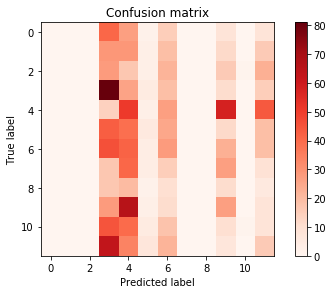

In [26]:
from sklearn.metrics import confusion_matrix
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# accuracy for test & train:
train_acc=svc.score(pcafeatures_train, y_train,sample_weight=wt_train_)
test_acc=svc.score(pcafeatures_test,y_test,sample_weight=wt_test_)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = svc.predict(pcafeatures_test)
conf = confusion_matrix(y_true, y_pred,sample_weight=wt_test_)
print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ('\nConfusion Matrix:\n')
print(conf.astype(int))

cm=confusion_matrix(y_true, y_pred, labels=None)

plt.figure()
plot_confusion_matrix(cm)